### Single Decision Tree

In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, matthews_corrcoef, confusion_matrix, classification_report, ConfusionMatrixDisplay
from joblib import dump, load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils

covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 


In [2]:
X_clean, y_clean = utils.clean_data(X, y)

X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
41804,2991,85,9,503,72,5124,233,225,124,5501,...,0,0,0,0,0,0,0,0,0,0
14445,3360,185,13,566,102,4468,222,249,158,2561,...,0,0,0,0,0,0,0,0,1,0
194721,3286,352,8,90,6,4097,206,226,158,1635,...,0,0,0,0,0,0,0,0,0,0
317944,2861,103,13,607,29,450,242,222,108,1170,...,0,0,0,0,0,0,0,0,1,0
166561,2834,97,9,108,13,1184,236,227,122,1832,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241604,2074,294,23,384,10,418,151,228,214,1025,...,0,0,0,0,0,0,0,0,0,1
407181,3120,281,11,182,0,1679,189,241,192,825,...,0,0,0,0,0,0,0,0,1,0
190419,3023,352,5,0,0,3129,211,231,158,361,...,0,0,0,0,0,0,0,0,0,0
60063,2858,248,5,30,0,3126,209,244,173,4052,...,0,0,0,0,0,0,0,0,0,0


# Decision tree with sklearn


In [3]:
mcc_scorer = make_scorer(matthews_corrcoef)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=34)

param_grid_tree = {"max_depth": [None, 5, 10, 20, 30, 35, 40, 45], "criterion": ["gini", "entropy"]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, scoring=mcc_scorer, cv=cv, verbose=3)
grid_tree.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END ....criterion=gini, max_depth=None;, score=0.862 total time=   3.2s
[CV 2/2] END ....criterion=gini, max_depth=None;, score=0.862 total time=   3.2s
[CV 1/2] END .......criterion=gini, max_depth=5;, score=0.515 total time=   0.9s
[CV 2/2] END .......criterion=gini, max_depth=5;, score=0.519 total time=   0.9s
[CV 1/2] END ......criterion=gini, max_depth=10;, score=0.631 total time=   1.7s
[CV 2/2] END ......criterion=gini, max_depth=10;, score=0.640 total time=   1.7s
[CV 1/2] END ......criterion=gini, max_depth=20;, score=0.819 total time=   2.7s
[CV 2/2] END ......criterion=gini, max_depth=20;, score=0.825 total time=   2.8s
[CV 1/2] END ......criterion=gini, max_depth=30;, score=0.862 total time=   3.0s
[CV 2/2] END ......criterion=gini, max_depth=30;, score=0.861 total time=   3.2s
[CV 1/2] END ......criterion=gini, max_depth=35;, score=0.863 total time=   3.1s
[CV 2/2] END ......criterion=gini, max_depth=35;

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [4]:
best_tree = grid_tree.best_estimator_
best_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [5]:
y_train = np.array(y_train, dtype=np.int64)
y_test = np.array(y_test, dtype=np.int64)
y_pred = best_tree.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.943701969828662


Test MCC: 0.9096079988144543

Confusion Matrix:
[[39928  2252     1     0    28     6   153]
 [ 2154 53994   144     2   222   116    29]
 [    1   131  6726    48     7   238     0]
 [    0     1    65   456     0    27     0]
 [   24   245    20     0  1599    11     0]
 [    5   127   242    23     7  3069     0]
 [  181    32     0     0     0     0  3889]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.93      0.94      0.94      7151
           4       0.86      0.83      0.85       549
           5       0.86      0.84      0.85      1899
           6       0.89      0.88      0.88      3473
           7       0.96      0.95      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.91      0.91      0.91    116203
weighted avg       0.94      0.94      0.94    116203



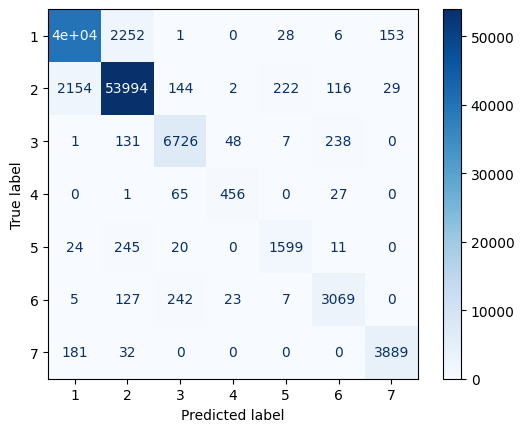

In [6]:
y_test_pred = best_tree.predict(X_test)
test_mcc = matthews_corrcoef(y_test, y_test_pred)
print("Test MCC:", test_mcc)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap="Blues")
plt.show()

In [7]:
dump(best_tree, "../data/best_decision_tree.joblib")

['../data/best_decision_tree.joblib']

# Visualization

['Aspen', 'Lodgepole Pine', 'Spruce/Fir', 'Krummholz', 'Ponderosa Pine', 'Douglas-fir', 'Cottonwood/Willow']


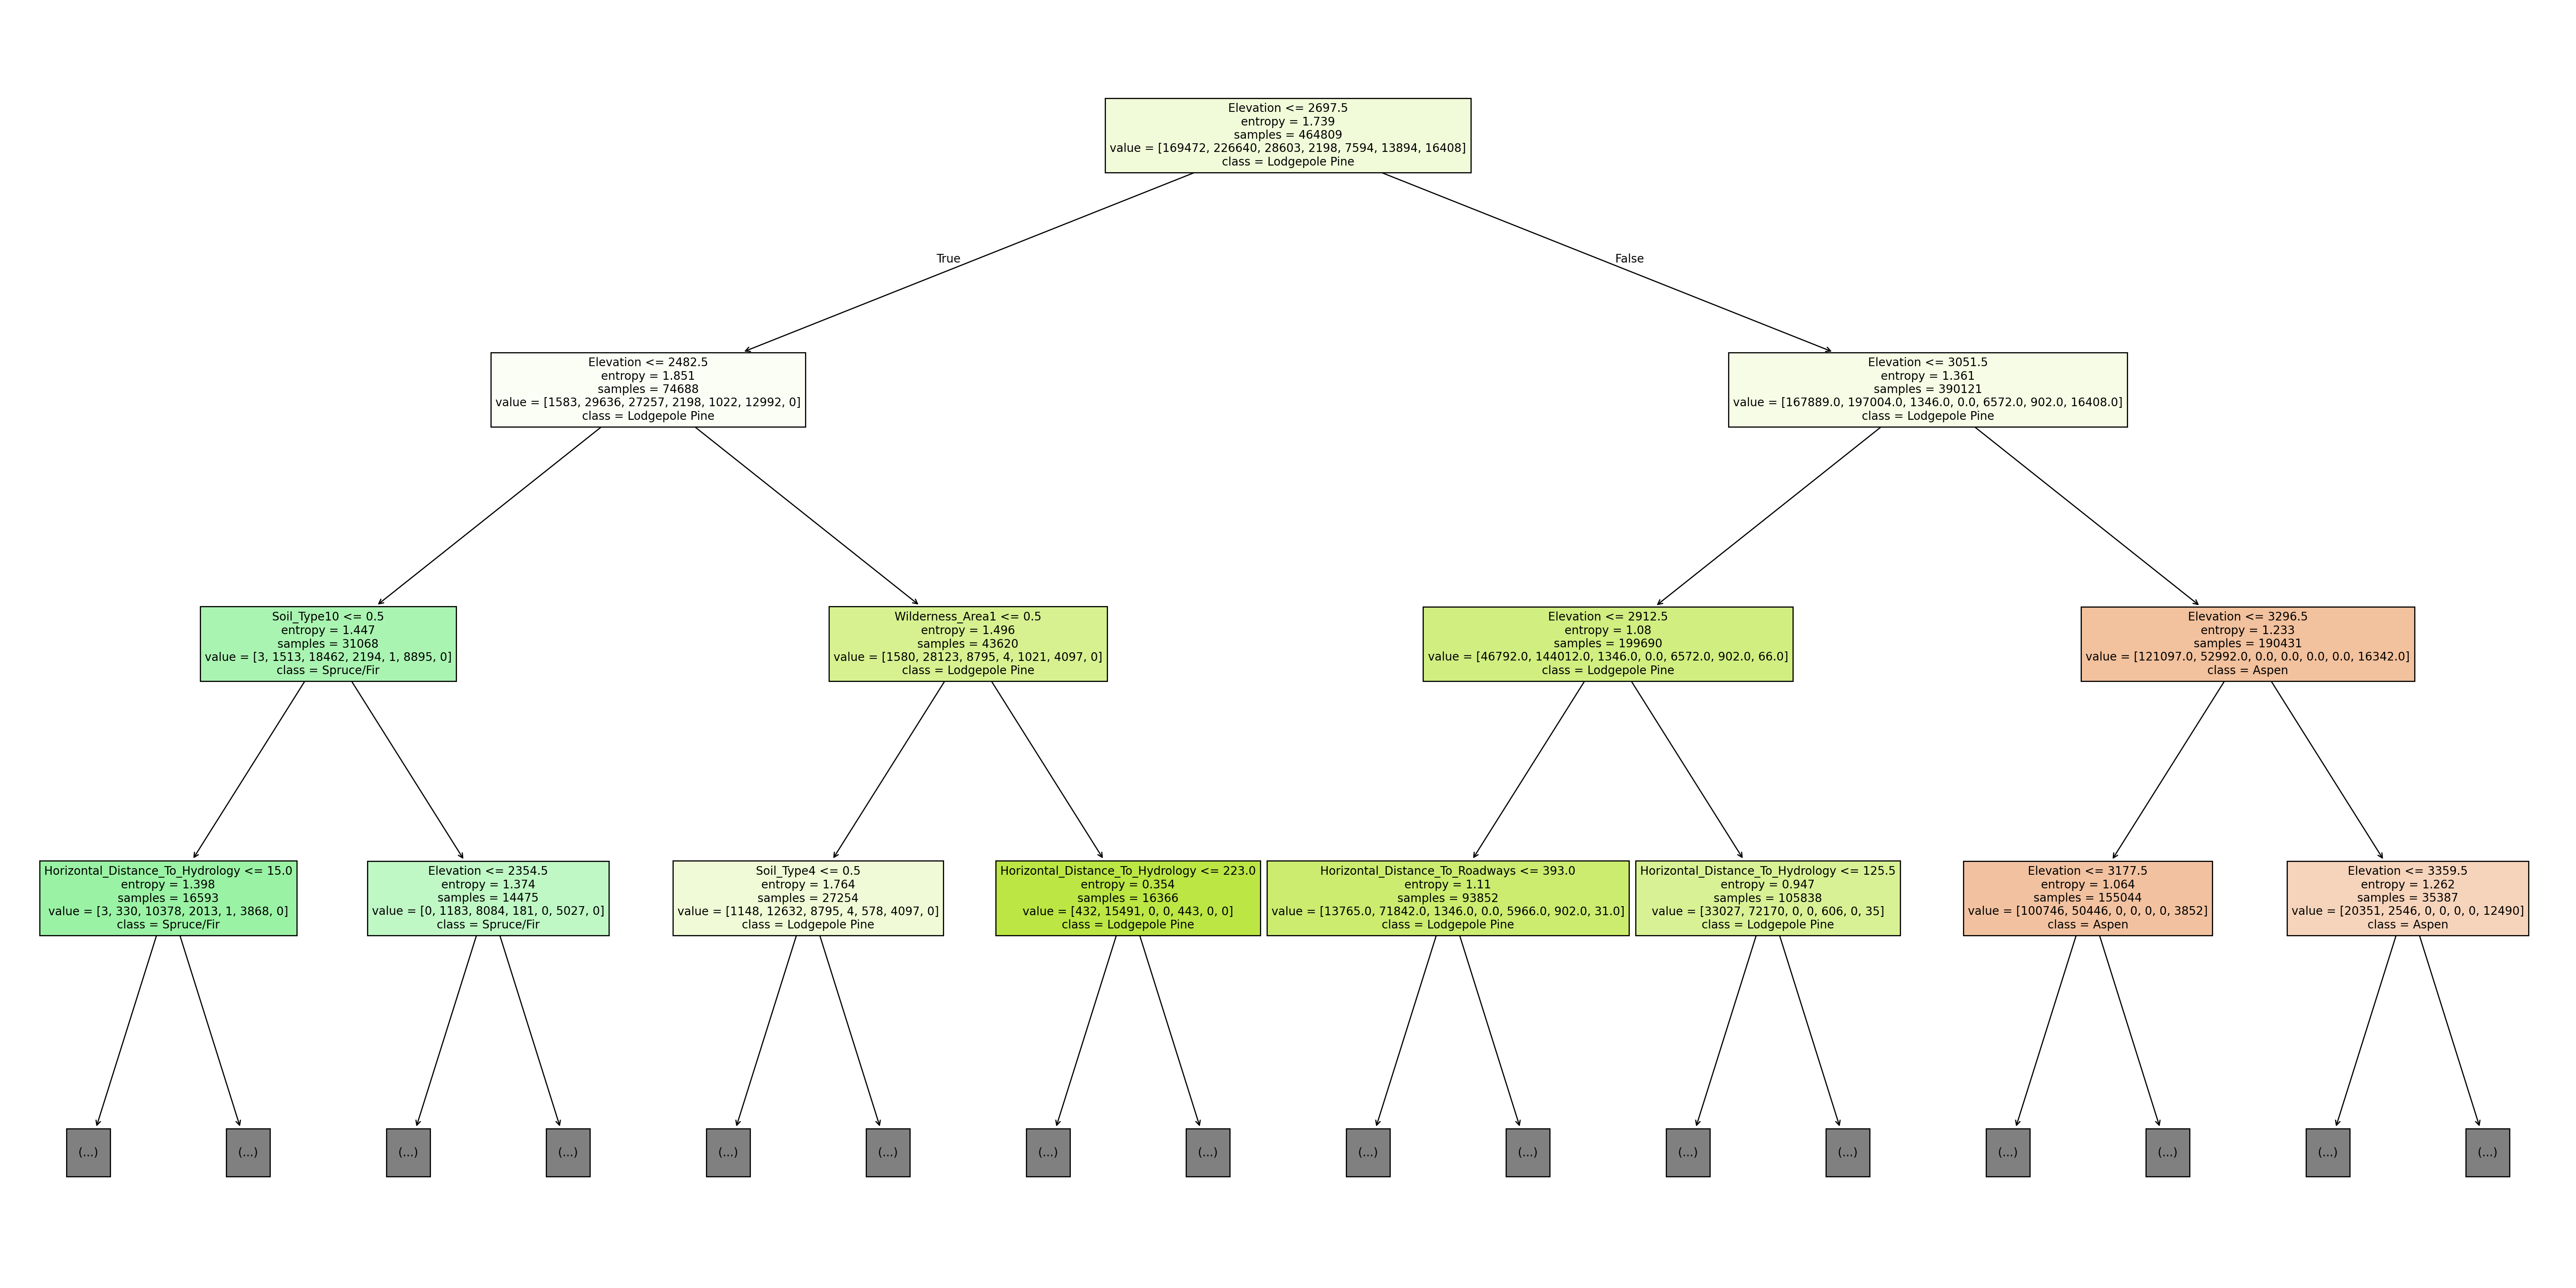

In [8]:


forest_names_map = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}

y_temp = y.squeeze()
y_named = y_temp.map(forest_names_map)
class_names = list(y_named.unique())

plt.figure(figsize=(40, 20), dpi=200) 

print(class_names)
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    max_depth=3,
    fontsize=10
)

plt.show()